# fastai MNIST exercise

In [1]:
#setup
!pip install -qq fastbook

In [2]:
import fastbook
fastbook.setup_book()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/fastbook/__init__.py:18: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [3]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap = 'Grays')

In [4]:
#path to handwritten digit images
path = untar_data(URLs.MNIST_SAMPLE)
print(path)

/home/ec2-user/.fastai/data/mnist_sample


In [5]:
Path.BASE_PATH = path


In [6]:
path.ls()

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

In [7]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [8]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [9]:
#draw one example
im3_path = threes[0]
im3 = Image.open(im3_path)
im3

In [10]:
#computer sees image as  an array of gray values
array(im3)[10:15,10:15]

array([[  0,   0,   0,  24, 209],
       [  0,   0,  91, 137, 253],
       [ 40, 214, 250, 254, 254],
       [ 81, 247, 254, 254, 254],
       [  0, 110, 246, 254, 254]], dtype=uint8)

In [11]:
#or in tensor
tensor(im3)[10:15,10:15]

tensor([[  0,   0,   0,  24, 209],
        [  0,   0,  91, 137, 253],
        [ 40, 214, 250, 254, 254],
        [ 81, 247, 254, 254, 254],
        [  0, 110, 246, 254, 254]], dtype=torch.uint8)

In [12]:
#use pandas to color code gray values
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[3:20,8:20])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,42,118,219,166,118,118,6,0,0
2,0,0,103,242,254,254,254,254,254,66,0,0
3,0,0,18,232,254,254,254,254,254,238,70,0
4,0,0,0,104,244,254,224,254,254,254,141,0
5,0,0,0,0,207,254,210,254,254,254,34,0
6,0,0,0,0,84,206,254,254,254,254,41,0
7,0,0,0,0,0,24,209,254,254,254,171,0
8,0,0,0,0,91,137,253,254,254,254,112,0
9,0,0,40,214,250,254,254,254,254,254,34,0


In [13]:
#load all images into tensors
three_tensors = [tensor(Image.open(o)) for o in threes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
len(three_tensors), len(seven_tensors)

(6131, 6265)

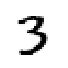

In [14]:
cmap = {'cmap':'Greys'}
show_image(three_tensors[1], **cmap) #added kwargs to address the error, when default 'cmap':'Grays'

In [15]:
#stack the images and cast the values as float (0,1)
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [16]:
len(stacked_threes.shape), stacked_threes.ndim

(3, 3)

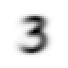

In [17]:
#stack by mean
mean3 = stacked_threes.mean(0) #argument 0 to set which dimension to stack
show_image(mean3, **cmap)

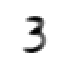

In [18]:
#stack by median
med3 = stacked_threes.quantile(q = 0.5, dim = 0)
show_image(med3, **cmap)

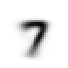

In [19]:
#for sevens
mean7 = stacked_sevens.mean(0)
show_image(mean7, **cmap)

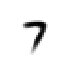

In [20]:
med7 = stacked_sevens.quantile(0.5, 0)
show_image(med7, **cmap)

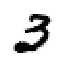

In [21]:
#use a single image of a three as example
a_3 = stacked_threes[random.randint(0,len(three_tensors))]
show_image(a_3, **cmap)

In [22]:
#l1 and mse loss against ideal 3
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_rmse = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_rmse

(tensor(0.1626), tensor(0.2909))

In [23]:
#l1 and mse loss against ideal 7
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_rmse = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_rmse

(tensor(0.1980), tensor(0.3578))

PyTorch already provides both of these as loss functions. You'll find these inside torch.nn.functional, which the PyTorch team recommends importing as F (and is available by default under that name in fastai):

In [24]:
F.l1_loss(a_3, mean7), F.mse_loss(a_3, mean7).sqrt()

(tensor(0.1980), tensor(0.3578))

load in validation set

In [25]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [26]:
def mnist_dist(a,b):
    return (a-b).abs().mean((-1,-2)) #this tuple is to calculate the mean over the horizontal and vertical axes
mnist_dist(a_3,mean3)

tensor(0.1626)

In [27]:
(a_3-mean3).abs().mean(-1)

tensor([0.0000e+00, 0.0000e+00, 7.2232e-05, 6.9526e-03, 1.8226e-01, 2.3415e-01, 2.0523e-01, 2.7159e-01, 2.0934e-01, 1.5139e-01, 1.2678e-01, 1.9288e-01, 2.0395e-01, 2.4688e-01, 2.5058e-01, 1.8091e-01,
        1.3107e-01, 1.0753e-01, 1.9383e-01, 3.4617e-01, 3.7668e-01, 3.2729e-01, 2.7897e-01, 2.3365e-01, 8.2959e-02, 1.0329e-02, 4.0703e-04, 0.0000e+00])

In [28]:
#get distance of validating set of 3s to mean3
valid_3_dist = mnist_dist(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1674, 0.1449, 0.1508,  ..., 0.1143, 0.1343, 0.1202]),
 torch.Size([1010]))

So in this case, PyTorch treats mean3, a rank-2 tensor representing a single image, as if it were 1,010 copies of the same image, and then subtracts each of those copies from each 3 in our validation set. What shape would you expect this tensor to have? 

In [29]:
#using a simple rule that the distance of a sample 3 is closer to mean3 than mean7, return that it is '3'
def is_3(x):
    return mnist_dist(x,mean3) < mnist_dist(x,mean7)

In [30]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In this example, it is judged a '3'.
We can iterate through the entire validation set

In [31]:
is_3(valid_3_tens)

tensor([ True,  True, False,  ...,  True,  True, False])

In [32]:
#check accuracy with this simplified approach
accuracy_3 = is_3(valid_3_tens).float().mean()
accuracy_7 = (1 - is_3(valid_7_tens).float()).mean() # subtract off 1 because is_3 checks against mean7
accuracy_3, accuracy_7, (accuracy_3 + accuracy_7)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

## Stochastic Gradient Descent (SGD)
Do you remember the way that Arthur Samuel described machine learning, which we quoted in <

: Suppose we arrange for some automatic means of testing the effectiveness of any current weight assignment in terms of actual performance and provide a mechanism for altering the weight assignment so as to maximize the performance. We need not go into the details of such a procedure to see that it could be made entirely automatic and to see that a machine so programmed would "learn" from its experience.

As we discussed, this is the key to allowing us to have a model that can get better and better—that can learn. But our pixel similarity approach does not really do this. We do not have any kind of weight assignment, or any way of improving based on testing the effectiveness of a weight assignment. In other words, we can't really improve our pixel similarity approach by modifying a set of parameters. In order to take advantage of the power of deep learning, we will first have to represent our task in the way that Arthur Samuel described it.

Instead of trying to find the similarity between an image and an "ideal image," we could instead look at each individual pixel and come up with a set of weights for each one, such that the highest weights are associated with those pixels most likely to be black for a particular category. For instance, pixels toward the bottom right are not very likely to be activated for a 7, so they should have a low weight for a 7, but they are likely to be activated for an 8, so they should have a high weight for an 8. This can be represented as a function and set of weight values for each possible category—for instance the probability of being the number 8:

def pr_eight(x,w): return (x*w).sum()
Here we are assuming that x is the image, represented as a vector—in other words, with all of the rows stacked up end to end into a single long line. And we are assuming that the weights are a vector w. If we have this function, then we just need some way to update the weights to make them a little bit better. With such an approach, we can repeat that step a number of times, making the weights better and better, until they are as good as we can make them.

We want to find the specific values for the vector w that causes the result of our function to be high for those images that are actually 8s, and low for those images that are not. Searching for the best vector w is a way to search for the best function for recognising 8s. (Because we are not yet using a deep neural network, we are limited by what our function can actually do—we are going to fix that constraint later in this chapter.)

To be more specific, here are the steps that we are going to require, to turn this function into a machine learning classifier:

Initialize the weights.
For each image, use these weights to predict whether it appears to be a 3 or a 7.
Based on these predictions, calculate how good the model is (its loss).
Calculate the gradient, which measures for each weight, how changing that weight would change the loss
Step (that is, change) all the weights based on that calculation.
Go back to the step 2, and repeat the process.
Iterate until you decide to stop the training process (for instance, because the model is good enough or you don't want to wait any longer).
These seven steps, illustrated in <

In [33]:
#a simple case
def f(x): return x**2
xt = tensor(3.).requires_grad_() #tells the tensor to remember the gradient calculations
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [34]:
yt.backward() #calculate the gradient

In [35]:
xt.grad

tensor(6.)

In [36]:
#works also with a list
xt = tensor([2.,4.,10.]).requires_grad_()
def f(x): return (x**2).sum()
yt = f(xt)
yt

tensor(120., grad_fn=<SumBackward0>)

In [37]:
yt.backward()
xt.grad

tensor([ 4.,  8., 20.])

In [38]:
#take an example of a data of speed ~ time
time = torch.arange(0,20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

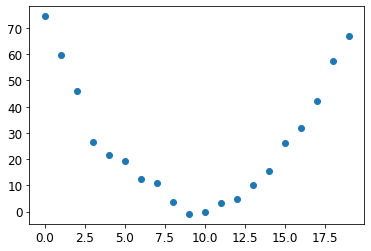

In [39]:
#define its relationship to speed
import matplotlib.pyplot as plt
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.plot(time, speed, 'o')

In [40]:
#define a quadratic function
def f(t,params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [41]:
#function for mse calculation
def mse(preds, targets):
    return ((preds-targets)**2).mean().sqrt()

In [42]:
#initialize parameters
params = torch.randn(3).requires_grad_()
orig_params = params.clone()

In [43]:
#calculate the predictions
preds = f(time, params)

In [44]:
#function to plot out prediction vs targets
def show_preds(preds, ax = None):
    if ax is None: ax=plt.subplots()[1]
    ax.plot(time,speed, 'o')
    ax.plot(time, to_np(preds), 'o', color='red')
    ax.set_ylim(-300,100)

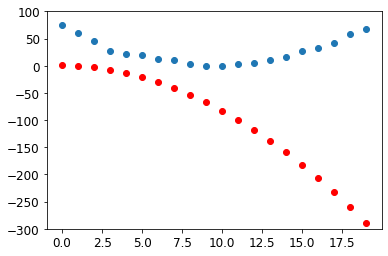

In [45]:
show_preds(preds)

In [46]:
loss = mse(preds,speed)
loss

tensor(160.6979, grad_fn=<SqrtBackward>)

In [47]:
loss.backward()
params.grad

tensor([-165.5151,  -10.6402,   -0.7900])

In [48]:
params.grad * 1e-3

tensor([-0.1655, -0.0106, -0.0008])

In [49]:
orig_params, params

(tensor([-0.7658, -0.7506,  1.3525], grad_fn=<CloneBackward>),
 tensor([-0.7658, -0.7506,  1.3525], requires_grad=True))

In [50]:
#lr is learning rate
lr = 1e-3
params.data -= lr*params.grad.data
params.grad = None

In [51]:
preds = f(time, params)
mse(preds, speed)

tensor(133.2652, grad_fn=<SqrtBackward>)

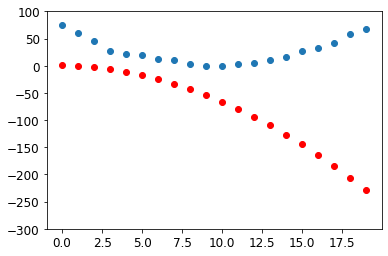

In [52]:
show_preds(preds)

In [53]:
#define a function to go through these steps
def apply_step(params, prn = True):
    preds = f(time, params)
    loss= mse(preds,speed)
    loss.backward()
    params.data -= lr*params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [54]:
#run it 10 times
for i in range(30): apply_step(params)

133.26524353027344
106.2302474975586
79.95720672607422
55.385318756103516
35.366943359375
26.461618423461914
26.02068519592285
26.01849937438965
26.018320083618164
26.018157958984375
26.017993927001953
26.017831802368164
26.017669677734375
26.01750946044922
26.017345428466797
26.017181396484375
26.017019271850586
26.01685905456543
26.016695022583008
26.01653289794922
26.016372680664062
26.016210556030273
26.016050338745117
26.015886306762695
26.015722274780273
26.015560150146484
26.015398025512695
26.01523780822754
26.01507568359375
26.01491355895996


In [55]:
params = orig_params.detach().requires_grad_()

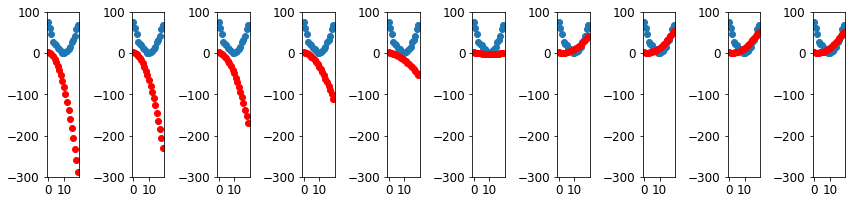

In [56]:
_,axs = plt.subplots(1,10, figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

## The MNIST Loss Function
We already have our independent variables x—these are the images themselves. We'll concatenate them all into a single tensor, and also change them from a list of matrices (a rank-3 tensor) to a list of vectors (a rank-2 tensor). We can do this using view, which is a PyTorch method that changes the shape of a tensor without changing its contents. -1 is a special parameter to view that means "make this axis as big as necessary to fit all the data":

In [57]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
#label for each image, 1 for threes and 0 for sevens
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [58]:
dset = list(zip(train_x, train_y)) #so that a tuple (x,y) is returned when indexed
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [59]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [60]:
#initialize random weights for each pixel
def init_params(size, std = 1.0):
    return (torch.randn(size)*std).requires_grad_()

In [61]:
weights = init_params((28 * 28, 1))
bias = init_params(1) #this is the intercept term, which will be 0 when the pixel is 0

In neural networks, the w in the equation  y = w\*x + b  is called weights, and the b is called the bias. These together make up the parameters.

In [62]:
#calculate prediction of one image
(train_x[0]*weights.T).sum() + bias

tensor([20.2336], grad_fn=<AddBackward0>)

In [63]:
#use matrix multiplication, instead of looping through each image.
def linear1(xb): 
    return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

In [64]:
corrects = (preds > 0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [65]:
corrects.float().mean().item()

0.4912068545818329

considering that the initialized weights were random, yet I get the same answer as the text book, it suggests that change in weights is not going to change the accuracy.
Or this loss function isn't a great way to measure how well the machine has learned.

In [66]:
#let's change the weight a little bit
weights[0] *= 1.0001
preds = linear1(train_x)
corrects1 = (preds > 0.0).float() == train_y
corrects1.float().mean().item()

0.4912068545818329

This loss function is in fact a simple linear model over each 28\*28 pixel. Its guess is only as good as a coin flip, or this loss function is not appropriate for this exercise.

As we've seen, we need gradients in order to improve our model using SGD, and in order to calculate gradients we need some loss function that represents how good our model is. That is because the gradients are a measure of how that loss function changes with small tweaks to the weights.

So, we need to choose a loss function. The obvious approach would be to use accuracy, which is our metric, as our loss function as well. In this case, we would calculate our prediction for each image, collect these values to calculate an overall accuracy, and then calculate the gradients of each weight with respect to that overall accuracy.

Unfortunately, we have a significant technical problem here. The gradient of a function is its slope, or its steepness, which can be defined as rise over run—that is, how much the value of the function goes up or down, divided by how much we changed the input. We can write this in mathematically as: (y_new - y_old) / (x_new - x_old). This gives us a good approximation of the gradient when x_new is very similar to x_old, meaning that their difference is very small. But accuracy only changes at all when a prediction changes from a 3 to a 7, or vice versa. The problem is that a small change in weights from x_old to x_new isn't likely to cause any prediction to change, so (y_new - y_old) will almost always be 0. In other words, the gradient is 0 almost everywhere.

A very small change in the value of a weight will often not actually change the accuracy at all. This means it is not useful to use accuracy as a loss function—if we do, most of the time our gradients will actually be 0, and the model will not be able to learn from that number.

S: In mathematical terms, accuracy is a function that is constant almost everywhere (except at the threshold, 0.5), so its derivative is nil almost everywhere (and infinity at the threshold). This then gives gradients that are 0 or infinite, which are useless for updating the model.

Instead, we need a loss function which, when our weights result in slightly better predictions, gives us a slightly better loss. So what does a "slightly better prediction" look like, exactly? Well, in this case, it means that if the correct answer is a 3 the score is a little higher, or if the correct answer is a 7 the score is a little lower.

In [67]:
#simple example of targets and predictions
trgts = tensor([1,0,1])
prds = tensor([0.9,0.4,0.2])

In [68]:
#loss function to measure distance between predictions and targets
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean() #this .where() function is similar to list comprehension [b[i] if a[i] else c[i] for i in range(len(a))]

In [69]:
torch.where(trgts == 1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [70]:
mnist_loss(prds, trgts), mnist_loss(tensor([0.9,0.4,0.8]), trgts)

(tensor(0.4333), tensor(0.2333))

so far we have assumed that predictions are values between 0 and 1.
but this is not always the case.  To ensure this property, we can use the sigmoid function

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/fastbook/__init__.py:73: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


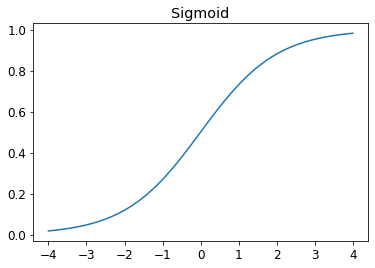

In [71]:
plot_function(torch.sigmoid, title = 'Sigmoid', min = -4, max = 4)

In [72]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets == 1, 1-predictions, predictions).mean()

Now we can be confident our loss function will work, even if the predictions are not between 0 and 1. All that is required is that a higher prediction corresponds to higher confidence an image is a 3.

Having defined a loss function, now is a good moment to recapitulate why we did this. After all, we already had a metric, which was overall accuracy. So why did we define a loss?

The key difference is that the metric is to drive human understanding and the loss is to drive automated learning. To drive automated learning, the loss must be a function that has a meaningful derivative. It can't have big flat sections and large jumps, but instead must be reasonably smooth. This is why we designed a loss function that would respond to small changes in confidence level. This requirement means that sometimes it does not really reflect exactly what we are trying to achieve, but is rather a compromise between our real goal, and a function that can be optimized using its gradient. The loss function is calculated for each item in our dataset, and then at the end of an epoch the loss values are all averaged and the overall mean is reported for the epoch.

Metrics, on the other hand, are the numbers that we really care about. These are the values that are printed at the end of each epoch that tell us how our model is really doing. It is important that we learn to focus on these metrics, rather than the loss, when judging the performance of a model.

## SGD and Mini-Batches
Now that we have a loss function that is suitable for driving SGD, we can consider some of the details involved in the next phase of the learning process, which is to change or update the weights based on the gradients. This is called an optimization step.

In order to take an optimization step we need to calculate the loss over one or more data items. How many should we use? We could calculate it for the whole dataset, and take the average, or we could calculate it for a single data item. But neither of these is ideal. Calculating it for the whole dataset would take a very long time. Calculating it for a single item would not use much information, so it would result in a very imprecise and unstable gradient. That is, you'd be going to the trouble of updating the weights, but taking into account only how that would improve the model's performance on that single item.

So instead we take a compromise between the two: we calculate the average loss for a few data items at a time. This is called a mini-batch. The number of data items in the mini-batch is called the batch size. A larger batch size means that you will get a more accurate and stable estimate of your dataset's gradients from the loss function, but it will take longer, and you will process fewer mini-batches per epoch. Choosing a good batch size is one of the decisions you need to make as a deep learning practitioner to train your model quickly and accurately. We will talk about how to make this choice throughout this book.

Another good reason for using mini-batches rather than calculating the gradient on individual data items is that, in practice, we nearly always do our training on an accelerator such as a GPU. These accelerators only perform well if they have lots of work to do at a time, so it's helpful if we can give them lots of data items to work on. Using mini-batches is one of the best ways to do this. However, if you give them too much data to work on at once, they run out of memory—making GPUs happy is also tricky!

In [73]:
#example mini batch with DataLoader
coll = range(15)
dl = DataLoader(coll, batch_size = 5, shuffle = True)
list(dl)

[tensor([11,  9, 12, 14,  7]),
 tensor([ 8,  5, 10,  3,  2]),
 tensor([ 1,  6, 13,  0,  4])]

In [74]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [75]:
dl = DataLoader(ds, batch_size = 6, shuffle = True)
list(dl)

[(tensor([ 2, 13, 14,  6, 12,  8]), ('c', 'n', 'o', 'g', 'm', 'i')),
 (tensor([15, 16,  4, 19,  3, 21]), ('p', 'q', 'e', 't', 'd', 'v')),
 (tensor([ 7, 18, 17, 24, 10,  1]), ('h', 's', 'r', 'y', 'k', 'b')),
 (tensor([ 5, 20, 23, 25,  0, 22]), ('f', 'u', 'x', 'z', 'a', 'w')),
 (tensor([11,  9]), ('l', 'j'))]

if you shuffle a list of tuples, say (predictions, targets), it will preserve the mapping

In [76]:
#initialize parameters
weights = init_params((28*28,1))
bias = init_params(1)

In [77]:
dl = DataLoader(dset, batch_size = 256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [78]:
valid_dl = DataLoader(valid_dset, batch_size = 256)

In [79]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [80]:
preds = linear1(batch)
preds

tensor([[-2.1876],
        [-8.3973],
        [ 2.5000],
        [-4.9473]], grad_fn=<AddBackward0>)

In [81]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.7419, grad_fn=<MeanBackward0>)

In [82]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0061), tensor([-0.0420]))

In [83]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [84]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0121), tensor([-0.0840]))

In [85]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0182), tensor([-0.1260]))

The gradients changed, even though we have not changed the weights.
That's because loss.backward adds the gradients of loss to any gradients currently stored.
So, we have to set current gradients to 0 first.

In [86]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

Inplace Operations: Methods in PyTorch whose names end in an underscore modify their objects in place. For instance, bias.zero_() sets all elements of the tensor bias to 0.

Our only remaining step is to update the weights and biases based on the gradient and learning rate. When we do so, we have to tell PyTorch not to take the gradient of this step too—otherwise things will get very confusing when we try to compute the derivative at the next batch! If we assign to the data attribute of a tensor then PyTorch will not take the gradient of that step. Here's our basic training loop for an epoch:

In [87]:
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [88]:
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [False],
        [ True],
        [False]])

In [89]:
#function for accuracy of the batch
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [90]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.2500)

In [91]:
#put the batches together
def validate_epoch(model):
    accs = [batch_accuracy(model(xb),yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [92]:
validate_epoch(linear1)

0.5261

the starting point based on our first randomly initialized parameters
train one epoch to see if things improved

In [93]:
lr = 1. #learning rate
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.6663

some improvements.
we do a few more times

In [94]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end = ' ')

0.8265 0.89 0.9183 0.9276 0.9398 0.9467 0.9506 0.9525 0.9559 0.9579 0.9599 0.9609 0.9613 0.9618 0.9633 0.9638 0.9648 0.9657 0.9672 0.9677 

## Creating an Optimizer
Because this is such a general foundation, PyTorch provides some useful classes to make it easier to implement. The first thing we can do is replace our linear1 function with PyTorch's nn.Linear module. A module is an object of a class that inherits from the PyTorch nn.Module class. Objects of this class behave identically to standard Python functions, in that you can call them using parentheses and they will return the activations of a model.

nn.Linear does the same thing as our init_params and linear together. It contains both the weights and biases in a single class. Here's how we replicate our model from the previous section:

In [95]:
linear_model = nn.Linear(28*28, 1)
#every pyTorch module knows what parameters it needs
w, b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [96]:
#create an optimizer
class BasicOptim:
    def __init__(self, params, lr):
        self.params, self.lr = list(params), lr
    
    def step(self, *args, **kwargs):
        for p in self.params:
            p.data -= p.grad.data * self.lr
            
    def zero_grad(self, *args, **kwargs):
        for p in self.params:
            p.grad = None

In [97]:
opt = BasicOptim(linear_model.parameters(), lr)

In [98]:
#simplify the training loop to
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [99]:
#validate_epoch, batch accuracy remains the same
validate_epoch(linear_model)

0.4607

In [100]:
#put the training loop into a single function
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end = ' ')

In [101]:
train_model(linear_model, 20)

0.4932 0.7686 0.8555 0.9136 0.9346 0.9482 0.957 0.9634 0.9658 0.9678 0.9697 0.9717 0.9736 0.9746 0.9761 0.977 0.9775 0.9775 0.978 0.9785 

The fastai provides the SGD class which, by default, does the same thing as BasicOptim

In [102]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.8179 0.8496 0.914 0.9346 0.9482 0.957 0.9619 0.9658 0.9673 0.9692 0.9712 0.9741 0.9751 0.9761 0.9775 0.9775 0.978 0.9785 0.979 

fastai also has a Learner.fit, which can be used in place of train_model

In [123]:
dls = DataLoaders(dl, valid_dl)

To create a Learner without using an application (such as cnn_learner) we need to pass in all the elements that we've created in this chapter: the DataLoaders, the model, the optimization function (which will be passed the parameters), the loss function, and optionally any metrics to print:

In [104]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
               loss_func=mnist_loss, metrics=batch_accuracy)

In [105]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636709,0.503144,0.495584,00:00
1,0.429828,0.248517,0.777233,00:00
2,0.161680,0.155361,0.861629,00:00
3,0.072948,0.097721,0.917566,00:00
4,0.040128,0.073205,0.936212,00:00
5,0.027210,0.059466,0.950442,00:00
6,0.021837,0.050799,0.957802,00:00
7,0.019398,0.044980,0.964181,00:00
8,0.018122,0.040853,0.966143,00:00
9,0.017330,0.037788,0.968106,00:00


## adding non-linearity (ReLU; activating function)
The above implements a simple linear classifier (a single node).  To feed the output of that node to the next, say a linear classifier again, would collectively end up as a single linear function.\
Say, f1(x) = aX1 + B1;\
f2(x) = cX2 + B2, where X2 = f1(x).\
Then, f2(x) = c(aX1 + B1) + B2 = acX1 + cB1+B2 -> another linear classifier with different coefficients.\
The goal is to add something non-linear in between.  In this case, a Rectified Linear Unit (ReLU), which outputs 0 unless the input is positive.

In [106]:
def simple_net(xb):
    res = xb@w1 + b1
    res = res.max(tensor(0.0)) #this is ReLU; or also implementable as F.relu
    res = res@w2 + b2
    return res

#initialize the parameters
w1 = init_params((28*28,30)) #30 is an arbitrary number of your choosing; 1 means a single output
b1 = init_params(30) #to match w1
w2 = init_params((30, 1)) #1 to get a single output
b2 = init_params(1)

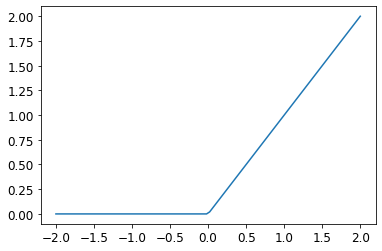

In [107]:
plot_function(F.relu)

In [124]:
#one can also implement in nn.Sequential, which defines the sequence of the layers to be executed
simple_net = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30,10),
    nn.ReLU(),
    nn.Linear(10,1)
)

In [125]:
#using the learner module by Fastai
learn = Learner(dls, simple_net, opt_func = SGD,
               loss_func=mnist_loss, metrics=batch_accuracy)

In [126]:
learn.fit(40,0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.410616,0.429587,0.504416,00:00
1,0.185256,0.293513,0.713445,00:00
2,0.089244,0.132287,0.893523,00:00
3,0.050857,0.084011,0.932287,00:00
4,0.034591,0.063573,0.947988,00:00
5,0.027102,0.052195,0.959274,00:00
6,0.023268,0.045094,0.963199,00:00
7,0.021007,0.040339,0.966634,00:00
8,0.019485,0.036938,0.968597,00:00
9,0.018348,0.034385,0.969578,00:00


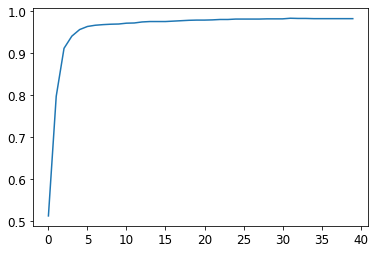

In [111]:
#learner records all these values in learn.recorder
plt.plot(L(learn.recorder.values).itemgot(2))

In [ ]:
#the accuracy of the final epoch
learn.recorder.values[-1][2]

In [116]:
#we can also use the train_model defined above
def simple_net2(xb):
    res = xb@w1 + b1
    res = res.max(tensor(0.0)) #this is ReLU; or also implementable as F.relu
    res = res@w2 + b2
    return res

#initialize the parameters
w1 = init_params((28*28,30)) #30 is an arbitrary number of your choosing; 1 means a single output
b1 = init_params(30) #to match w1
w2 = init_params((30, 1)) #1 to get a single output
b2 = init_params(1)
opt = BasicOptim((w1,b1,w2,b2), 0.1)
train_model(simple_net2, 10)

0.5153 0.7046 0.7713 0.8583 0.8924 0.9086 0.9188 0.9276 0.9315 0.9363 

In [117]:
train_model(simple_net2, 10)

0.9422 0.9432 0.9461 0.951 0.9529 0.9554 0.9564 0.9588 0.9603 0.9598 

Up until this point, we have implemented 2 layers of learning. \
We can go 'deeper' (ie the name Deep Learning), by adding more layers, but will add computation time.\
The following example is provided under the fastai module

In [119]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False,
                   loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1,0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.116263,0.011971,0.995584,02:23


cnn_learner - convoluted neural network learner.\
Here, instead of taking one big matrix and feed over few layers, it partitions the matrix into smaller matrices and feed over many more layers.\
The reason for doing this is performance - we get better results with small matrices over deeper layers.

## Questionnaire
1. How is a grayscale image represented on a computer? How about a color image?\
as a matrix, each representing a pixel and the gray value (up to 255).  color image as a collection of 3 channels (RGB).\
2. How are the files and folders in the MNIST_SAMPLE dataset structured? Why?\
path/train/x/  path/valid/x/   where x is 3 or 7.  Training set to train the machine, validation set to 'test' the machine (previously unseen data)\
3. Explain how the "pixel similarity" approach to classifying digits works.\
It calculates the distance of each pixel of the input to the "ideal" digit of interest, and aggregates the difference.  The bigger the difference, the more likely it is not the digit of interest.\
4. What is a list comprehension? Create one now that selects odd numbers from a list and doubles them.\
A list comprehension is creating a list of elements from an iterable following a rule.\


In [140]:
x = range(20)
[i*2 for i in x if i%2]

[2, 6, 10, 14, 18, 22, 26, 30, 34, 38]

5. What is a "rank-3 tensor"?\
rank-3 tensor is a matrix with 3 dimensions.\
6. What is the difference between tensor rank and shape? How do you get the rank from the shape?\
tensor rank tells you how many dimension the matrix has, and tensor shape is the size of each dimension. tensor.shape returns a vector of the size of each dimension, so counting number of elements in tensor.shape gives tensor rank; len(tensor.shape)\
7. What are RMSE and L1 norm?\
RMSE - root mean squared error (the average difference of observed value to the fitted value, squared and then root)\
L1 norm - the mean absolute difference between obs value and fitted value.\
8. How can you apply a calculation on thousands of numbers at once, many thousands of times faster than a Python loop?\
By using Broadcasting.  Calculation in C, or CUDA if computing on a GPU\
9. Create a 3×3 tensor or array containing the numbers from 1 to 9. Double it. Select the bottom-right four numbers.\


In [156]:
x = torch.arange(1,10).view(3,3)
x.repeat(1,2)[2,-4:]

tensor([9, 7, 8, 9])

10. What is broadcasting?\
broadcasting allows calculation between two tensors of different ranks (so makes codes easier to write and read), and it calculates faster than a usual python for loop.\
11. Are metrics generally calculated using the training set, or the validation set? Why?\
validation set.  Beacuse the model has not seen this set of data yet.\
12. What is SGD?\
Stochastic Gradient Descent.  It is used for optimization by "going down" the gradient, starting from a random point.
13. Why does SGD use mini-batches?\
Optimize the parameters over small batches of data in parallel.\
14. What are the seven steps in SGD for machine learning?\
initialize parameters\
initialize model or calculate predictions\
calculate loss\
calculate the gradients\
step the weights (update the weights)\
repeat the process\
stop\
15. How do we initialize the weights in a model?\
Randomly.  Can be done with nn module (i.e. nn.Linear())\ 
16. What is "loss"?\
loss is the difference between the observed and the fitted values.\
17. Why can't we always use a high learning rate?\
might miss the turning point\
18. What is a "gradient"?\
A slope\
19. Do you need to know how to calculate gradients yourself?\
Yes, conceptually.\
20. Why can't we use accuracy as a loss function?\
Because it is difficult to calculate the gradient from accuracy (y_old and y_new could very well stay the same, so a lot of 0s)\
21. Draw the sigmoid function. What is special about its shape?\
For any input value of x, the output is always between 0 and 1.\
22. What is the difference between a loss function and a metric?\
loss function is useful for  the optimization process, and a metric is to measure outcome of the model.\
23. What is the function to calculate new weights using a learning rate?\
step\
24. What does the DataLoader class do?\
split a list into batches.\
25. Write pseudocode showing the basic steps taken in each epoch for SGD.\
#get predictions\
preds = model(params)\
#calculate loss\
loss = dist(preds, valid_ds)\
#calculate gradient\
loss.backward()\
params.grad.zero_()\
26. Create a function that, if passed two arguments [1,2,3,4] and 'abcd', returns [(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]. What is special about that output data structure?\
each index returns a tuple - which can be used as (independent variable, dependent variable)

In [160]:
def afunc(x,y):
    return list(zip(x,y))
afunc([1,2,3,4],'abcd')

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

27. What does view do in PyTorch?\
view allows changing the shape of a tensor without changing the contents.\
28. What are the "bias" parameters in a neural network? Why do we need them?\
It is like the intercept of a straight line.  To avoid getting a lot of zeroes.\
29. What does the @ operator do in Python?\
matrix multiplication\
30. What does the backward method do?\
backpropagation to calculate the gradient\
31. Why do we have to zero the gradients?\
it is stored in memory, and backward() just adds to existing memory.\
32. What information do we have to pass to Learner?\
Learner(dataset, model, optimization function, loss function, metrics)\
33. Show Python or pseudocode for the basic steps of a training loop.\
def train_epoch(input, model):\
    #get predictions\
    preds = model(params)\
    #calculate loss\
    loss = loss_func(preds, valid_ds)\
    #calculate gradient\
    loss.backward()\
    params.grad.zero_()\
    
def validate_epoch(model):\
    res = [batch_accuracy(xb,yb) for xb,yb in dataset]\
    return res\

for i in range(x):\
    train_epoch(model)\
    validate_epoch(model)\


34. What is "ReLU"? Draw a plot of it for values from -2 to +2.\
ReLU is Rectifying Linear Unit.  It returns the input itself, and 0 if input is negative.\
35. What is an "activation function"?\
activation function passes the output from a node as input to another node that introduces non-linearity to it.\
36. What's the difference between F.relu and nn.ReLU?\
usage.  nn.ReLU is used in the nn module.\
37. The universal approximation theorem shows that any function can be approximated as closely as needed using just one nonlinearity. So why do we normally use more?\
For performance.  We can go deeper without using as many parameters (smaller input matrices).\

Further Research\
Create your own implementation of Learner from scratch, based on the training loop shown in this chapter.\
Complete all the steps in this chapter using the full MNIST datasets (that is, for all digits, not just 3s and 7s). This is a significant project and will take you quite a bit of time to complete! You'll need to do some of your own research to figure out how to overcome some obstacles you'll meet on the way.